In [1]:
from pmlb import fetch_data
import torch
import os
from utils import get_formula
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(f'Using device: {device}')

/home/philipp/anaconda3/envs/srbench/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [2]:
path_pmlb_datasets = os.path.join('~/projects/phyiscalLawLearning/pmlb', 'datasets')

In [3]:
function_name = 'feynman_II_6_11'

In [4]:
x, y = fetch_data(function_name, return_X_y=True, local_cache_dir=path_pmlb_datasets)

In [5]:
x = torch.tensor(x, device=device, dtype=torch.double)
y = torch.tensor(y, device=device, dtype=torch.double)

In [6]:
target_formula = get_formula(function_name)

In [7]:
def data_feynmann(function_name):
    path_pmlb_datasets = os.path.join('~/projects/phyiscalLawLearning/pmlb', 'datasets')
    x, y = fetch_data(function_name, return_X_y=True, local_cache_dir=path_pmlb_datasets)
    x = np.asarray(x).astype(np.float64)
    y = np.asarray(y).astype(np.float64)
    target_formula = get_formula(function_name)
    if len(y) > 1000:
        subset = np.random.choice(len(y), 1000, replace=False)
    else:
        subset = np.arange(len(y))
    x = x[subset]
    y = y[subset]
    return x, y, target_formula, None

In [8]:
x.shape, y.shape

(torch.Size([100000, 4]), torch.Size([100000]))

In [9]:
torch.norm(y, p=2)

tensor(7.1990, dtype=torch.float64)

In [10]:
torch.norm(y - torch.mean(y), p=2)

tensor(6.4379, dtype=torch.float64)

In [11]:
from sympy.parsing.sympy_parser import parse_expr

In [12]:
string = '0.08*x1*cos(0.999*x2 + 3.144)/(-0.001*x0**2*x1 - 0.002*x0**2*x2 - 0.001*x0**2*x3 + 0.002*x0**2*cos(0.999*x2 + 3.144) + 0.005*x0**2 - 0.002*x0*x1*x2 + 0.001*x0*x1*cos(0.999*x2 + 3.144) + 0.005*x0*x1 + 0.004*x0*x2**2 + 0.002*x0*x2*x3 - 0.021*x0*x2 - 0.997*x0*x3**2 - 0.005*x0*x3*cos(0.999*x2 + 3.144) - 0.008*x0*x3 + 0.011*x0*cos(0.999*x2 + 3.144) + 0.019*x0 - 0.002*x1**2*x2 + 0.002*x1**2*cos(0.999*x2 + 3.144) + 0.003*x1**2 + 0.001*x1*x2**2 + 0.002*x1*x2*x3 - 0.002*x1*x2*cos(0.999*x2 + 3.144) - 0.004*x1*x3*cos(0.999*x2 + 3.144) - 0.005*x1*x3 - 0.002*x1*cos(0.999*x2 + 3.144) - 0.003*x1 - 0.009*x2**2*x3 + 0.011*x2**2*cos(0.999*x2 + 3.144) - 0.004*x2**2 - 0.002*x2*x3**2 + 0.013*x2*x3*cos(0.999*x2 + 3.144) + 0.027*x2*x3 - 0.045*x2*cos(0.999*x2 + 3.144) + 0.001*x3**2 - 0.004*x3*cos(0.999*x2 + 3.144) - 0.017*x3 + 0.046*cos(0.999*x2 + 3.144) + 0.014)'

In [13]:
parse_expr(string)

0.08*x1*cos(0.999*x2 + 3.144)/(-0.001*x0**2*x1 - 0.002*x0**2*x2 - 0.001*x0**2*x3 + 0.002*x0**2*cos(0.999*x2 + 3.144) + 0.005*x0**2 - 0.002*x0*x1*x2 + 0.001*x0*x1*cos(0.999*x2 + 3.144) + 0.005*x0*x1 + 0.004*x0*x2**2 + 0.002*x0*x2*x3 - 0.021*x0*x2 - 0.997*x0*x3**2 - 0.005*x0*x3*cos(0.999*x2 + 3.144) - 0.008*x0*x3 + 0.011*x0*cos(0.999*x2 + 3.144) + 0.019*x0 - 0.002*x1**2*x2 + 0.002*x1**2*cos(0.999*x2 + 3.144) + 0.003*x1**2 + 0.001*x1*x2**2 + 0.002*x1*x2*x3 - 0.002*x1*x2*cos(0.999*x2 + 3.144) - 0.004*x1*x3*cos(0.999*x2 + 3.144) - 0.005*x1*x3 - 0.002*x1*cos(0.999*x2 + 3.144) - 0.003*x1 - 0.009*x2**2*x3 + 0.011*x2**2*cos(0.999*x2 + 3.144) - 0.004*x2**2 - 0.002*x2*x3**2 + 0.013*x2*x3*cos(0.999*x2 + 3.144) + 0.027*x2*x3 - 0.045*x2*cos(0.999*x2 + 3.144) + 0.001*x3**2 - 0.004*x3*cos(0.999*x2 + 3.144) - 0.017*x3 + 0.046*cos(0.999*x2 + 3.144) + 0.014)

In [14]:
import sympy

In [15]:
x, y, z = sympy.symbols('x y z')
print(sympy.latex(sympy.Integral(sympy.sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


In [16]:
sympy.latex(sympy.parse_expr('x/y**2'))

'\\frac{x}{y^{2}}'

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('datasets', index_col=0, names=['Formula name', 'Formula'])

In [19]:
for i in range(241, 255):
    if i % 2 == 0:
        print(f'$\dot y ={sympy.latex(parse_expr(get_formula(df.loc[i, "Formula name"])))}$')
    else:
        print(f'$\dot x ={sympy.latex(parse_expr(get_formula(df.loc[i, "Formula name"])))}$')

$\dot x =- \frac{x y}{0.5 x^{2} + 1} - x + 20$
$\dot y =- \frac{x y}{0.5 x^{2} + 1} + 10$
$\dot x =- \sin{\left(x \right)} + 0.5 \sin{\left(x - y \right)}$
$\dot y =- \sin{\left(y \right)} - 0.5 \sin{\left(x - y \right)}$
$\dot x =- 0.05 x^{2} - \sin{\left(y \right)}$
$\dot y =x - \frac{\cos{\left(y \right)}}{x}$
$\dot x =- x^{2} - 2 x y + 3 x$
$\dot y =- x y - y^{2} + 2 y$
$\dot x =x \left(- x - \frac{y}{x + 1} + 4\right)$
$\dot y =y \left(\frac{x}{x + 1} - 0.075 y\right)$
$\dot x =\cos{\left(x \right)} \cot{\left(y \right)}$
$\dot y =\left(0.1 \sin^{2}{\left(y \right)} + \cos^{2}{\left(y \right)}\right) \sin{\left(x \right)}$
$\dot x =- \frac{10 x^{3}}{3} + \frac{10 x}{3} + 10 y$
$\dot y =- \frac{x}{10}$


In [20]:
x = [2,3,4]

In [21]:
x.remove(2dqn

SyntaxError: invalid decimal literal (2809675116.py, line 1)

In [26]:
import numpy as np
np.random.seed(123456)
feynman_indices = [i for i in range(120, 239) if not i in [179, 188, 193, 220]]
random_feynman_subset = np.sort(np.random.choice(feynman_indices, 15, replace=False))

In [27]:
for i in random_feynman_subset:
    formula_name = df.loc[i, "Formula name"].replace('_', '-').replace('f', 'F')
    formula_str = get_formula(df.loc[i, "Formula name"])
    # print(formula_str)
    if 'beta' in formula_str and 'gamma' in formula_str:
        raise ValueError(f'The formula {formula_str} includes "gamma" and "beta"')
    if 'beta' in formula_str or 'gamma' in formula_str:
        if not 'delta' in formula_str:
            formula_str = formula_str.replace('beta','delta').replace('gamma', 'delta')
        else:
            raise ValueError(f'The formula {formula_str} includes "delta" and "beta"')
        
    formula = sympy.latex(parse_expr(formula_str))
    formula = formula.replace('delta', 'beta')
    print(f'{formula_name} & $y ={formula}$' + '\\\\ \\hline')

Feynman-III-4-33 & $y =\frac{h \omega}{2 \pi \left(e^{\frac{h \omega}{2 \pi T kb}} - 1\right)}$\\ \hline
Feynman-III-8-54 & $y =\sin^{2}{\left(\frac{2 \pi E_{n} t}{h} \right)}$\\ \hline
Feynman-II-15-4 & $y =- B mom \cos{\left(\theta \right)}$\\ \hline
Feynman-II-24-17 & $y =\sqrt{- \frac{\pi^{2}}{d^{2}} + \frac{\omega^{2}}{c^{2}}}$\\ \hline
Feynman-II-34-29b & $y =\frac{2 \pi B Jz g_{} mom}{h}$\\ \hline
Feynman-I-12-5 & $y =Ef q_{2}$\\ \hline
Feynman-I-18-4 & $y =\frac{m_{1} r_{1} + m_{2} r_{2}}{m_{1} + m_{2}}$\\ \hline
Feynman-I-38-12 & $y =\frac{\epsilon h^{2}}{\pi m q^{2}}$\\ \hline
Feynman-I-39-22 & $y =\frac{T kb n}{V}$\\ \hline
Feynman-I-40-1 & $y =n_{0} e^{- \frac{g m x}{T kb}}$\\ \hline
Feynman-I-43-31 & $y =T kb mob$\\ \hline
Feynman-I-8-14 & $y =\sqrt{\left(- x_{1} + x_{2}\right)^{2} + \left(- y_{1} + y_{2}\right)^{2}}$\\ \hline
Feynman-I-9-18 & $y =\frac{G m_{1} m_{2}}{\left(- x_{1} + x_{2}\right)^{2} + \left(- y_{1} + y_{2}\right)^{2} + \left(- z_{1} + z_{2}\right)^{2}}$\\

In [28]:
parse_expr('1/(4*pi)*alpha**2*h**2/(m**2*c**2)*(omega_0/omega)**2')

alpha**2*h**2*omega_0**2/(4*pi*c**2*m**2*omega**2)

In [33]:
for i in random_feynman_subset:
    formula_name = df.loc[i, "Formula name"]
    formula_str = get_formula(df.loc[i, "Formula name"])
    # print(formula_str)
    if 'beta' in formula_str and 'gamma' in formula_str:
        raise ValueError(f'The formula {formula_str} includes "gamma" and "beta"')
    if 'beta' in formula_str or 'gamma' in formula_str:
        if not 'delta' in formula_str:
            formula_str = formula_str.replace('beta','delta').replace('gamma', 'delta')
        else:
            raise ValueError(f'The formula {formula_str} includes "delta" and "beta"')
        
    formula = parse_expr(formula_str)
    print(f'{i}: {formula_name} & $y ={formula}$' + '\\\\ \\hline')

131: feynman_III_4_33 & $y =h*omega/(2*pi*(exp(h*omega/(2*pi*T*kb)) - 1))$\\ \hline
133: feynman_III_8_54 & $y =sin(2*pi*E_n*t/h)**2$\\ \hline
143: feynman_II_15_4 & $y =-B*mom*cos(theta)$\\ \hline
146: feynman_II_24_17 & $y =sqrt(-pi**2/d**2 + omega**2/c**2)$\\ \hline
153: feynman_II_34_29b & $y =2*pi*B*Jz*g_*mom/h$\\ \hline
174: feynman_I_12_5 & $y =Ef*q2$\\ \hline
185: feynman_I_18_4 & $y =(m1*r1 + m2*r2)/(m1 + m2)$\\ \hline
201: feynman_I_38_12 & $y =epsilon*h**2/(pi*m*q**2)$\\ \hline
204: feynman_I_39_22 & $y =T*kb*n/V$\\ \hline
205: feynman_I_40_1 & $y =n_0*exp(-g*m*x/(T*kb))$\\ \hline
208: feynman_I_43_31 & $y =T*kb*mob$\\ \hline
217: feynman_I_8_14 & $y =sqrt((-x1 + x2)**2 + (-y1 + y2)**2)$\\ \hline
218: feynman_I_9_18 & $y =G*m1*m2/((-x1 + x2)**2 + (-y1 + y2)**2 + (-z1 + z2)**2)$\\ \hline
227: feynman_test_17 & $y =(m**2*omega**2*x**2*(alpha*x/y + 1) + p**2)/(2*m)$\\ \hline
228: feynman_test_18 & $y =3*(H_G**2 + c**2*k_f/r**2)/(8*pi*G)$\\ \hline


### Explore why Strogatz is so complicated

In [26]:
import matplotlib.pyplot as plt

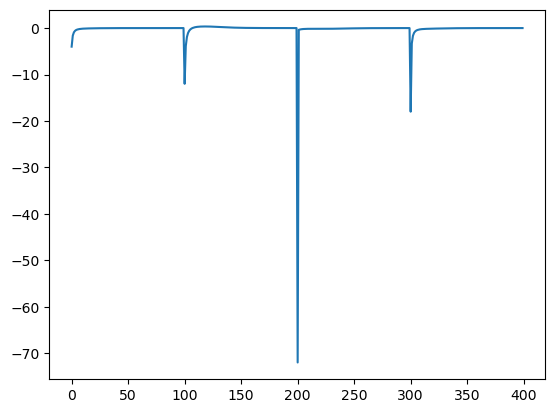

In [49]:
function_name = 'strogatz_lv1'
x, y = fetch_data(function_name, return_X_y=True, local_cache_dir=path_pmlb_datasets)
target_formula = get_formula(function_name)
target_formula
plt.plot(y)